# MLT-02 Clustering Companies

- Authored by: *Jay Parmar*
- Last modified on: *20th August 2023*

## Approach

1. Define a Clustering Task
2. Read the Dataset
3. Feature Extraction
4. Feature Scaling
5. Build Model

## 1. Clustering Task

*Cluster NIFTY50 companies into different clusters based on past 1-year volatility and returns.*

In [1]:
# Import necessary libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
import yfinance as yf

warnings.filterwarnings('ignore')

## 2. Read the Dataset

In [2]:
# Read the list of Nifty50 stock
stock_list = pd.read_csv('ind_nifty50list.csv')['Symbol'].to_list()

In [3]:
# Download past 1-year data for all symbols
data = yf.download([x+'.NS' for x in stock_list], period='1y', auto_adjust=True)

# Extract Close data
data = data['Close']

[*********************100%%**********************]  51 of 51 completed


1 Failed download:
['DUMMYREL.NS']: Exception('%ticker%: No data found, symbol may be delisted')


In [4]:
# Drop NaN values
data.dropna(axis=1, inplace=True)

## 3. Feature Extraction

In [5]:
# Create an empty dataframe
stocks_df = pd.DataFrame()

# Generate features
stocks_df['returns'] = (data.pct_change().dropna() + 1).prod() - 1
stocks_df['volatility'] = data.pct_change().dropna().std() * np.sqrt(252)

In [6]:
# Verify summary statistics
stocks_df.describe()

,returns,volatility
count,50.000000,50.000000
mean,0.110752,0.232862
std,0.159471,0.087941
min,-0.240331,0.167941
25%,-0.002993,0.189466
50%,0.094517,0.211822
75%,0.234144,0.250166
max,0.429999,0.744136


<Axes: xlabel='returns', ylabel='volatility'>

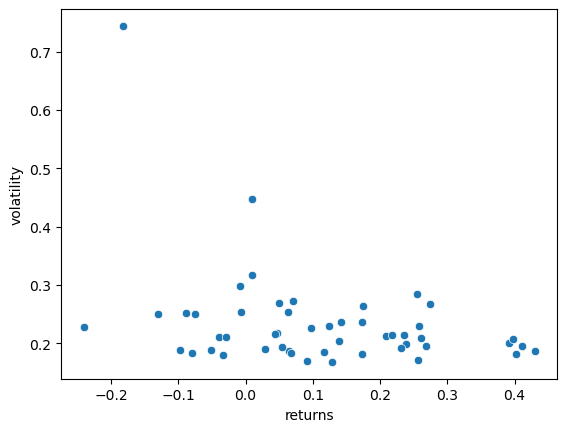

In [7]:
# Visualize how returns and volatility are related
sns.scatterplot(stocks_df, x='returns', y='volatility')

## 4. Feature Scaling

In [8]:
# Import the required library
from sklearn.preprocessing import StandardScaler

In [9]:
# Define a scaler object
scaler = StandardScaler()
stocks_df_scaled = scaler.fit_transform(stocks_df)

In [10]:
# Store the scaled data
stocks_df = pd.DataFrame(stocks_df_scaled, columns=['returns', 'volatility'])

In [11]:
# Verify the summary statistics
stocks_df.describe()

,returns,volatility
count,5.000000e+01,5.000000e+01
mean,-6.661338e-17,5.084821e-16
std,1.010153e+00,1.010153e+00
min,-2.223892e+00,-7.457353e-01
25%,-7.205055e-01,-4.984797e-01
50%,-1.028394e-01,-2.416796e-01
75%,7.816136e-01,1.987622e-01
max,2.022233e+00,5.872840e+00


## 5. Perform Clustering (Build Model)

In [12]:
# Import the K-Means algorithm
from sklearn.cluster import KMeans

In [13]:
# Build the model
km_model = KMeans(n_clusters=6).fit(stocks_df)

In [14]:
# Obtain a list of cluster labels
stocks_df['cluster'] = km_model.labels_

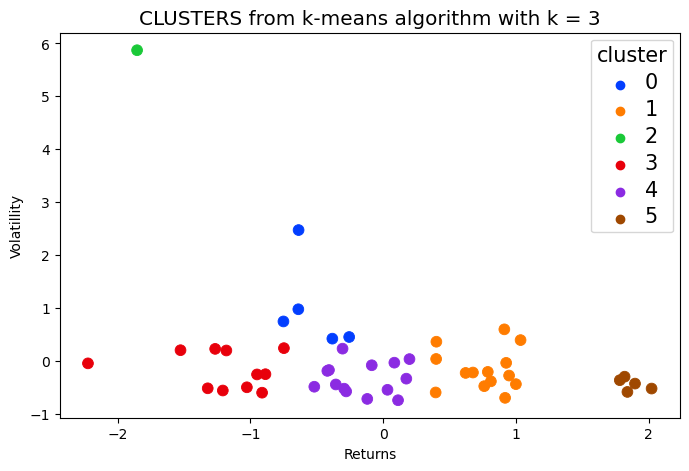

In [15]:
# Set graph size
plt.figure(figsize=(8, 5))

# Set x and y axis labels
ax = sns.scatterplot(y="volatility", x="returns", edgecolor='face', hue="cluster", 
                     data=stocks_df, palette='bright', s=60)

# Plot the graph
plt.xlabel('Returns')
plt.ylabel('Volatillity')
plt.setp(ax.get_legend().get_texts(), fontsize='15')
plt.setp(ax.get_legend().get_title(), fontsize='15')
plt.title('CLUSTERS from k-means algorithm with k = 3', fontsize='x-large')
plt.show()

### Model Intertia

Inertia measures how well a dataset was clustered by K-Means.

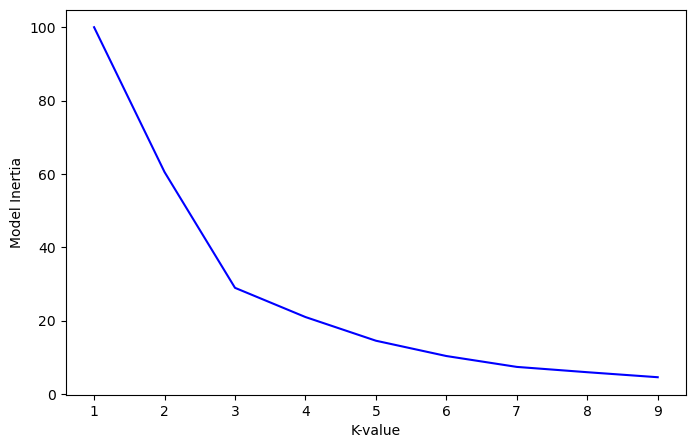

In [16]:
 # Calculating inertia for k-means models
# with different values of 'k'
inertia = []

k_range = range(1, 10)

for k in k_range:
    model = KMeans(n_clusters=k)
    model.fit(stocks_df[['returns', 'volatility']])
    inertia.append(model.inertia_)

# Plotting the 'elbow curve'
plt.figure(figsize=(8, 5))
plt.xlabel('K-value')
plt.ylabel('Model Inertia')
plt.plot(k_range, inertia, color='blue')
plt.show()

# Company Data

In [17]:
# Read the company data
cd = pd.read_csv("companydata.csv")

In [18]:
cd.head()

,Unnamed: 0,companyTickers,forward pe,price to book,forward eps,beta,quick ratio,debt to equity
0,MMM,MMM,13.128205,5.942137,10.92,0.945083,0.798,124.464
1,ACN,ACN,25.891247,9.010911,11.77,1.220519,1.143,15.849
2,ATVI,ATVI,20.800001,3.510433,3.85,0.524052,5.092,20.234
3,ADBE,ADBE,25.952652,13.845143,15.84,1.108131,0.933,33.307
4,AMD,AMD,19.710794,2.833470,4.91,1.940825,1.830,3.898


In [19]:
# Define a list of columns to keep
cols_to_keep = ['forward pe', 'price to book', 'forward eps', 'beta', 'quick ratio', 'debt to equity']

# Keep relevant columns
data = cd[cols_to_keep]

In [20]:
# Build the model
model = KMeans(n_clusters=3).fit(data)

In [21]:
# Obtain clusters
data['clusters'] = model.labels_

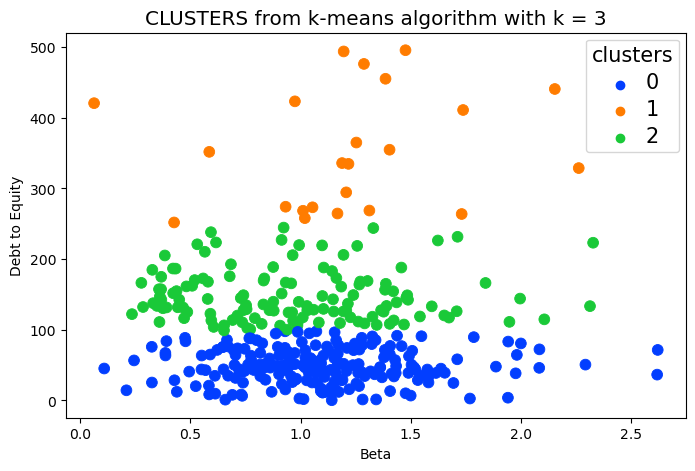

In [23]:
# Set graph size
plt.figure(figsize=(8, 5))

# Set x and y axis labels
ax = sns.scatterplot(y="debt to equity", x="beta", edgecolor='face', hue="clusters", 
                     data=data, palette='bright', s=60)

# Plot the graph
plt.xlabel('Beta')
plt.ylabel('Debt to Equity')
plt.setp(ax.get_legend().get_texts(), fontsize='15')
plt.setp(ax.get_legend().get_title(), fontsize='15')
plt.title('CLUSTERS from k-means algorithm with k = 3', fontsize='x-large')
plt.show()

In [ ]:
# Chart pairplot among all features
sns.pairplot(data, hue='clusters')